In [13]:
import pandas as pd
import glob, os
import numpy as np
import matplotlib.pyplot as plt
import hptlc


ModuleNotFoundError: No module named 'hptlc'

In [26]:
standard_eluants = ['LPDS', 'MPDS', 'HPDS']
standard_observations = ['254nm', '366nm', 'visible', 'developer']



os.chdir(".")
files = glob.glob("*.json")

indexes = []
for elu in standard_eluants:
    for obs in standard_observations:
        indexes.append(elu + "_" + obs)

empty = pd.DataFrame(data=None, index=range(n_components), columns=indexes)
empty

,LPDS_254nm,LPDS_366nm,LPDS_visible,LPDS_developer,MPDS_254nm,MPDS_366nm,MPDS_visible,MPDS_developer,HPDS_254nm,HPDS_366nm,HPDS_visible,HPDS_developer
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
empty['MPDS_254nm'] = [1, 2]
empty

,LPDS_254nm,LPDS_366nm,LPDS_visible,LPDS_developer,MPDS_254nm,MPDS_366nm,MPDS_visible,MPDS_developer,HPDS_254nm,HPDS_366nm,HPDS_visible,HPDS_developer
0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
import skfda
from skfda.preprocessing.dim_reduction import FPCA


all_curves = []
for file in files:
    curve = pd.read_json(file)['MPDS']['254nm']
    all_curves.append(curve['R']+curve['G']+curve['B'])

data_matrix = np.array(all_curves)

# Create FDataGrid
fd = skfda.representation.grid.FDataGrid(
    data_matrix=data_matrix,
    grid_points=np.linspace(0, 1, data_matrix.shape[1])  # domain grid [0,1]
)

n_components = 2
fpca = FPCA(n_components=n_components)
fpca.fit(fd)


scores = fpca.transform(fd)


TypeError: 'bool' object is not iterable

In [28]:
data_matrix

array([[ 0.02853968,  0.02708538,  0.02736716, ...,  0.0037635 ,
         0.00368699,  0.00305624],
       [ 0.01974342,  0.01522512,  0.01474374, ...,  0.00387964,
         0.00382936,  0.00475487],
       [-0.00542514, -0.00549297, -0.00449814, ...,  0.00534559,
         0.00451069,  0.00286964],
       ...,
       [-0.00274786, -0.00296206, -0.00200073, ...,  0.00324611,
         0.00313727,  0.00283729],
       [ 0.01679492,  0.01191884,  0.01143135, ...,  0.00238043,
         0.0022994 ,  0.0020585 ],
       [-0.03248858, -0.03263399, -0.03137547, ...,  0.00771409,
         0.00793649,  0.00652668]])

In [30]:
np.size(data_matrix)

22500

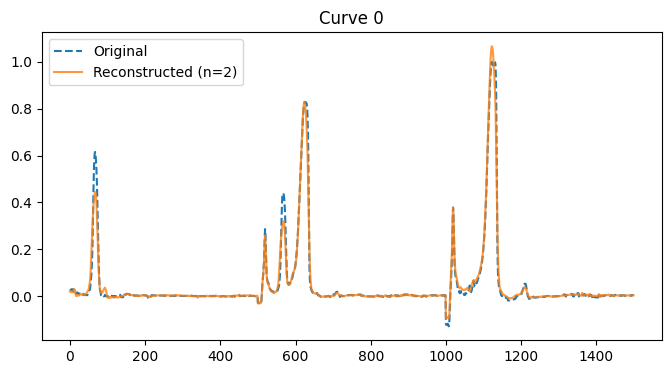

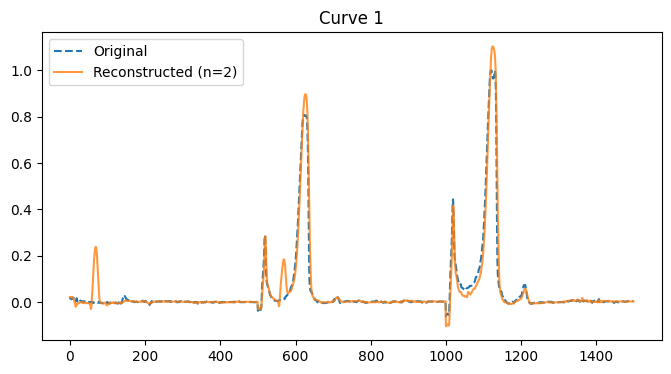

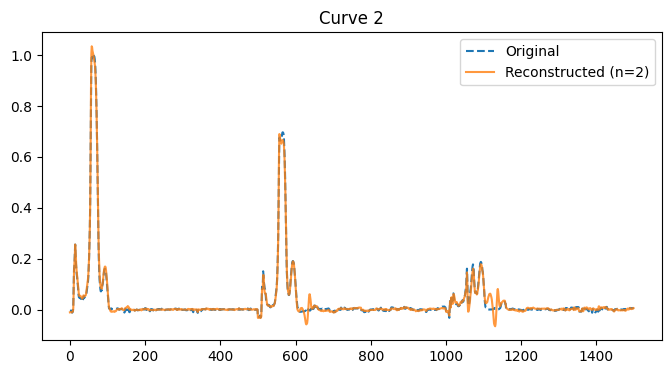

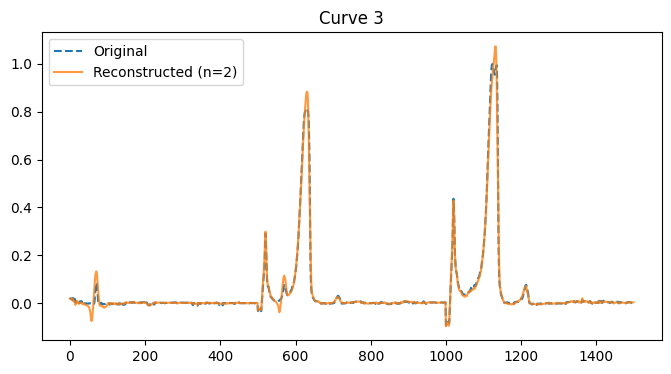

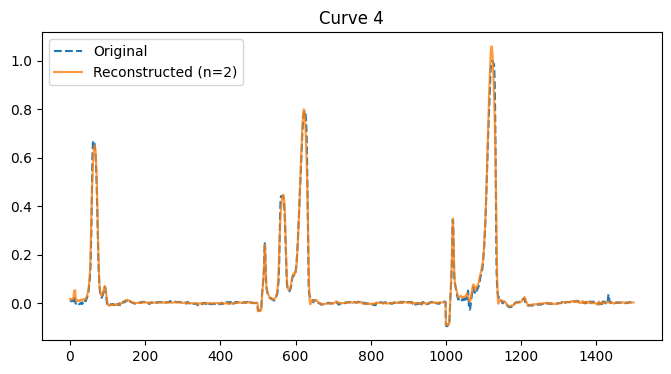

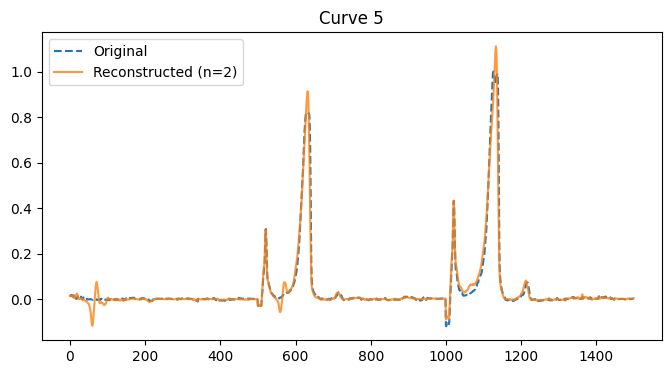

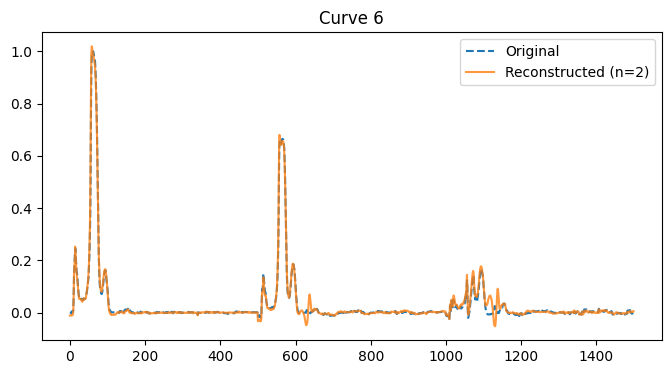

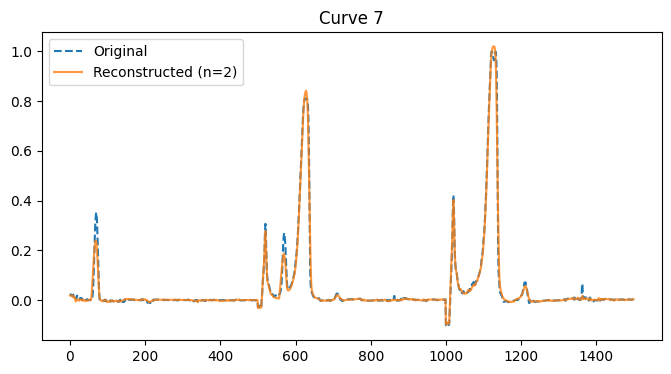

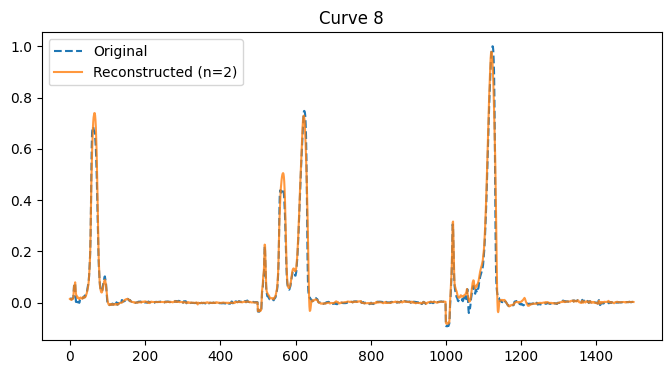

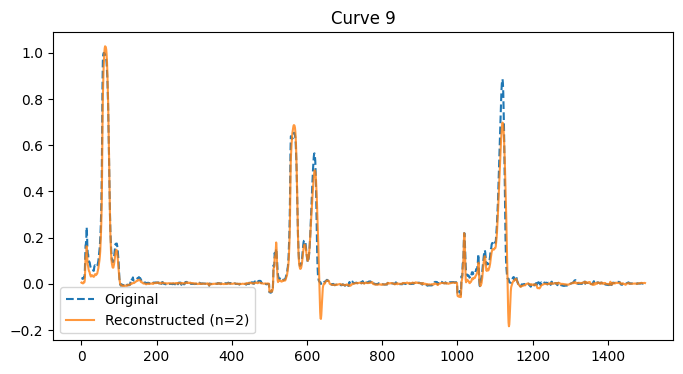

Mean Squared Error with 2 components: 0.0004807835676241148


In [115]:
# Transform to scores and reconstruct (inverse transform)
scores = fpca.transform(fd)
fd_reconstructed = fpca.inverse_transform(scores)

# Original and reconstructed data
original = fd.data_matrix[..., 0]
reconstructed = fd_reconstructed.data_matrix[..., 0]

print("Shape of FPCA features:", scores.shape)  # (15, 5)
print("First curve's coefficients:", scores[0])

# Plot first 3 curves
for i in range(10):
    plt.figure(figsize=(8, 4))
    plt.plot(original[i], label="Original", linestyle="--")
    plt.plot(reconstructed[i], label=f"Reconstructed (n={n_components})", alpha=0.8)
    plt.title(f"Curve {i}")
    plt.legend()
    plt.show()

# Reconstruction error (MSE)
mse = np.mean((original - reconstructed) ** 2)
print(f"Mean Squared Error with {n_components} components:", mse)

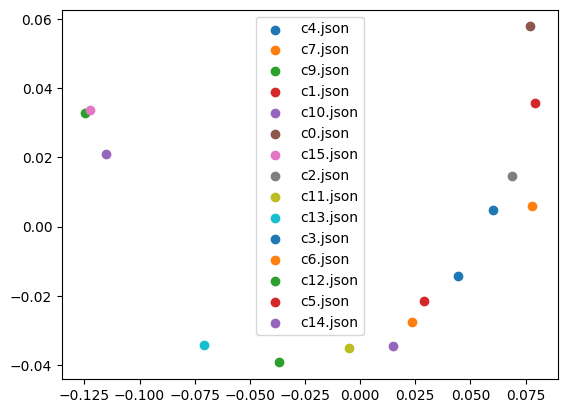

In [126]:
scores = fpca.fit_transform(fd)

for i in range(len(files)):
    plt.scatter(scores[i, 0], scores[i, 1], label=files[i])
plt.legend()

In [35]:
math.dist(scores[8], scores[14])

0.12344464294580536

In [50]:
all_distances = []
for elu in ["HPDS", "MPDS"]:
        for obs in ["254nm"]:
            all_distances.append(pd.read_csv(f"../distances/{elu}_{obs}.csv").iloc[:, 1:].values)


pd.DataFrame(columnsnp.nanmean(all_distances, axis=0))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0000,0.0665,0.1771,0.0711,0.0462,0.0915,0.1749,0.0431,0.0674,0.1258,0.0292,0.0326,0.0971,0.0220,0.1653
1,0.0665,0.0000,0.2080,0.0495,0.0851,0.0758,0.2059,0.0459,0.1010,0.1610,0.0522,0.0776,0.1307,0.0756,0.1968
2,0.1771,0.2080,0.0000,0.2058,0.1559,0.2066,0.0080,0.1954,0.1398,0.0950,0.1884,0.1609,0.1189,0.1642,0.0222
3,0.0711,0.0495,0.2058,0.0000,0.0987,0.0349,0.2036,0.0318,0.1124,0.1671,0.0474,0.0894,0.1394,0.0837,0.1962
4,0.0462,0.0851,0.1559,0.0987,0.0000,0.1152,0.1540,0.0780,0.0266,0.0959,0.0675,0.0157,0.0630,0.0276,0.1427
5,0.0915,0.0758,0.2066,0.0349,0.1152,0.0000,0.2042,0.0594,0.1262,0.1771,0.0719,0.1068,0.1514,0.1014,0.1987
6,0.1749,0.2059,0.0080,0.2036,0.1540,0.2042,0.0000,0.1932,0.1381,0.0952,0.1864,0.1590,0.1182,0.1622,0.0223
7,0.0431,0.0459,0.1954,0.0318,0.0780,0.0594,0.1932,0.0000,0.0945,0.1510,0.0170,0.0670,0.1227,0.0596,0.1847
8,0.0674,0.1010,0.1398,0.1124,0.0266,0.1262,0.1381,0.0945,0.0000,0.0763,0.0856,0.0403,0.0401,0.0504,0.1261
9,0.1258,0.1610,0.0950,0.1671,0.0959,0.1771,0.0952,0.1510,0.0763,0.0000,0.1418,0.1050,0.0415,0.1117,0.0782


In [48]:
all_distances

[array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, n

array([[0.    , 0.0665, 0.1771, 0.0711, 0.0462, 0.0915, 0.1749, 0.0431,
        0.0674, 0.1258, 0.0292, 0.0326, 0.0971, 0.022 , 0.1653],
       [0.0665, 0.    , 0.208 , 0.0495, 0.0851, 0.0758, 0.2059, 0.0459,
        0.101 , 0.161 , 0.0522, 0.0776, 0.1307, 0.0756, 0.1968],
       [0.1771, 0.208 , 0.    , 0.2058, 0.1559, 0.2066, 0.008 , 0.1954,
        0.1398, 0.095 , 0.1884, 0.1609, 0.1189, 0.1642, 0.0222],
       [0.0711, 0.0495, 0.2058, 0.    , 0.0987, 0.0349, 0.2036, 0.0318,
        0.1124, 0.1671, 0.0474, 0.0894, 0.1394, 0.0837, 0.1962],
       [0.0462, 0.0851, 0.1559, 0.0987, 0.    , 0.1152, 0.154 , 0.078 ,
        0.0266, 0.0959, 0.0675, 0.0157, 0.063 , 0.0276, 0.1427],
       [0.0915, 0.0758, 0.2066, 0.0349, 0.1152, 0.    , 0.2042, 0.0594,
        0.1262, 0.1771, 0.0719, 0.1068, 0.1514, 0.1014, 0.1987],
       [0.1749, 0.2059, 0.008 , 0.2036, 0.154 , 0.2042, 0.    , 0.1932,
        0.1381, 0.0952, 0.1864, 0.159 , 0.1182, 0.1622, 0.0223],
       [0.0431, 0.0459, 0.1954, 0.0318, 0